In [3]:
# Step 1
# Load the data
import pandas as pd

df = pd.read_csv('clean-data.csv')

In [4]:
# Step 2
# Print the data
data_size = df.shape[0]
print("Size: " + str(data_size))
# df.head(5)

Size: 2672


In [5]:
# Step 3
# Drop empty data
to_drop = []
for i, count in enumerate(df.isnull().sum()):
    if (float(count) / float(data_size) > 0.35):
        to_drop.append(df.columns[i])
        
df = df.drop(columns=to_drop)
# df.head()

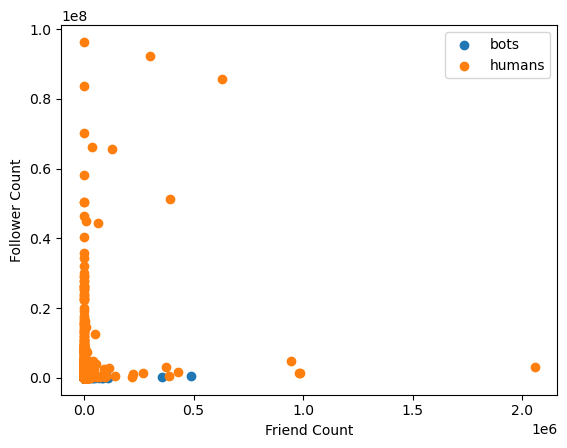

In [6]:
# Step 4
# Visualization
import matplotlib.pyplot as plt

df_bot = df[df.bot == 1]
df_hum = df[df.bot != 1]
plt.scatter(df_bot.friends_count, df_bot.followers_count, label="bots")
plt.scatter(df_hum.friends_count, df_hum.followers_count, label="humans")


plt.xlabel('Friend Count')
plt.ylabel('Follower Count')

# Data is hard to understand normally so uncomment on of these
# plt.xlim(0, 800)
# plt.ylim(0, 800)
# OR
# plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.show()

In [7]:
# Step 5
# Data Engineering
bag_of_words = ["bot", "follow me", "free", "fake", "virus", "troll", "clone", "tweet me"]

def contains_word(name, word_list):
    if not isinstance(name, str):
        return False
    for word in word_list:
        if word in name:
            return True
    return False

df['screen_name_binary'] = df['screen_name'].apply(lambda item: contains_word(item, bag_of_words))
df['name_binary'] = df['name'].apply(lambda item: contains_word(item, bag_of_words))
df['description_binary'] = df['description'].apply(lambda item: contains_word(item, bag_of_words))
df['status_binary'] = df['status'].apply(lambda item: contains_word(item, bag_of_words))

# df.head()

In [12]:
# Step 6
# Data Classification
from sklearn.tree import DecisionTreeClassifier

columns = ["friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified", "statuses_count"]
X = df[columns]
y = df.bot

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

# from sklearn.tree import export_text
# print(export_text(clf))

Training Accuracy:  0.9994652406417113
Testing Accuracy:  0.85785536159601


In [13]:
# Step 7
# Linear Classifier
from sklearn.linear_model import LogisticRegression

lclf = LogisticRegression()
lclf.fit(X_train,y_train)

y_train_pred = lclf.predict(X_train)
y_test_pred = lclf.predict(X_test)

print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.6711229946524064
Testing Accuracy:  0.7007481296758105


In [17]:
# Short Answers
 
# 1) It seems that people who are near to either axis (either low friends or low followers)
# are often bots.

# 2) For the DecisionTree, the training accuracy was 100% and the testing accuracy was
# 83.8%. The testing accuracy is more repersentative beacuse the tree is expected to answer
# data points it has already seen correctly.

# 3) The DecisionTree is a better classifier. Firstly, this is due to the fact that it has
# the ability to fit itself more to the data by virtue of being able to change more about
# itself. Secondly, what I described in part one has describes a concave area which a
# single line cannot define well.

# 4) 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train,y_train)

from sklearn.tree import export_text
print(export_text(clf))

# If the user is not verified and has less that 6 friends then they are classified as a
# bot. Being verified seems very important as it is impossible (in this simple model) for
# a verified use to be classified as a bot.

# 5) 
print(sum(df.bot) / df.shape[0])
# 46% of the data was bots. 85% accuracy is worse when there are more bots as you are getting more
# false positive which are worse than false negatives in this situation.

# 6) If the data is sorted by time and the sample is not collected randomly, then spliting the data
# like this would result in the model possibly being out of date to what modern bots look like. In
# general, it is better to have more data to train on to increase accuracy. 

# 7)
# 1. Which technology to use. This assignment mandated the use of jupyter and python which may not
# be ideal in every situation.
# 
# 2. Which collums to use and exclude. We started by removing collums with missing data and the
# arbitrarily selecting collums from that to further train on. These desicions could have been
# different.
# 3. Not excluding outliers. This assignment never removed outliers which could have cause models
# to fit aginast something in the training data that would be unlikely to appear in the testing data.
# 
# 4. What percentage of the data to use in training and testing. As talked about in question 4, the
# 30-70 split is good but not a universal best choice.
# 
# 5. Which classifiers to use. We only tested 2 classifiers and could have used any number of other
# ones.


|--- feature_5 <= 0.50
|   |--- feature_0 <= 5.50
|   |   |--- class: 1
|   |--- feature_0 >  5.50
|   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_0 <= 13643.00
|   |   |--- class: 0
|   |--- feature_0 >  13643.00
|   |   |--- class: 0

0.4625748502994012


In [18]:
# Part 2
# Step 1
# Making up data
import random

data = {'X1': [random.random() for _ in range(1000)],
        'X2': [random.random() for _ in range(1000)]}
data['Y'] = [1 if x1 + x2 > 1 else 0 for x1, x2 in zip(data['X1'], data['X2'])]

df = pd.DataFrame(data)

dfy = df[df.Y != 1]
dfn = df[df.Y == 1]
df.head()

,X1,X2,Y
0,0.583496,0.319435,0
1,0.818630,0.557480,1
2,0.895471,0.548839,1
3,0.002318,0.619149,0
4,0.863443,0.344884,1


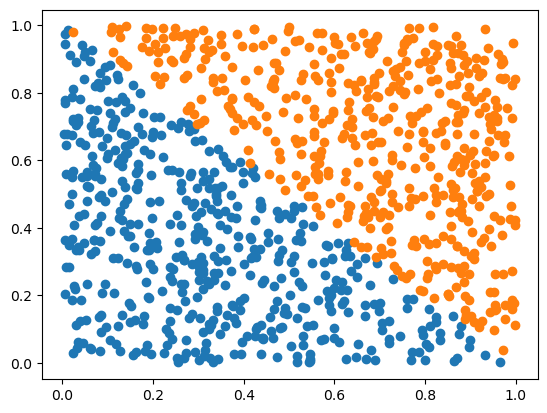

In [20]:
# Step 2
# Visualization
plt.scatter(dfy.X1, dfy.X2) # label="name"
plt.scatter(dfn.X1, dfn.X2)
plt.show()

In [19]:
# Step 3
# Classifier
X = df[["X1", "X2"]]
y = df.Y

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X,y)
y_pred = clf.predict(X)
print("DTC Accuracy: ", accuracy_score(y, y_pred))

lclf = LogisticRegression()
lclf.fit(X,y)
y_pred = lclf.predict(X)
print("LR Accuracy: ", accuracy_score(y, y_pred))

DTC Accuracy:  0.879
LR Accuracy:  0.995


In [20]:
# 1) The data in this is artificially consructed based on a single lineaar metric so
# the logistic regression should match this metric.

# 2) 86.6%

# 3)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)
y_pred = clf.predict(X)
print("DTC Accuracy: ", accuracy_score(y, y_pred))
# The accuracy is now 100%

# 4) The DecisionTreeClassifier with an arbitrarily large depth can achieve a
# near-perfect accuracy on this dataset by creating a very fine zig-zag pattern over
# as its model. This can be seen as in the leaf nodes of the export, it will compare
# to one metric being some value x and then compare to the other being 1-x.
 
# from sklearn.tree import export_text
# print(export_text(clf))
 

DTC Accuracy:  1.0
